# Indian Coin Predictions
### Fine tuning + mymodel

In [0]:
!pwd

/content


In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#Change dir to your projects
%cd /content/gdrive/'My Drive'/CNN/ # ←your project folder name
!pwd

/content/gdrive/My Drive/python
/content/gdrive/My Drive/python


In [0]:
!ls

 10rupee.jpeg			        DSProject_modified_model.json
 5rupee2.jpeg			        DSProject_modified_model_weights.h5
 CNN_VGG_handsone_Modified.ipynb        DSProject_original_model.json
 CNN_VGG.ipynb			        DSProject_original_model_weights.h5
 CNN_VGG_Mizumashi.ipynb	        Final1.png
'CNN_VGG_Mizumashi.ipynb のコピー'      Final2.png
 CNN_VGG_Modified.ipynb		        indian_coins_dataset
 CNN_VGG_Original.ipynb		        model_load.ipynb
 download.jpeg			        model_mizumashi_load.ipynb
 DSProject_mizumashi_model.json         model_original_load.ipynb
 DSProject_mizumashi_model_weights.h5   modified_coin_dataset
 DSProject_model.json		        modified_mizumashi_coin_dataset
 DSProject_model_weights.h5	        samplePic2


In [0]:
from keras.utils import np_utils
from keras import models
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Activation, Conv2D, Flatten, Dense, Dropout, Input
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD, Adadelta, Adagrad, Adam, Adamax, RMSprop, Nadam
from keras.callbacks import EarlyStopping
from PIL import Image
import numpy as np
import glob
import matplotlib.pyplot as plt
import time
import os

Using TensorFlow backend.


In [0]:
folder = os.listdir("modified_mizumashi_coin_dataset")
dense_size  = len(folder)

nameList = []
X = []
Y = []
for index, name in enumerate(folder):
    dir = "modified_mizumashi_coin_dataset/" + name
    nameList.append(name)
    files = glob.glob(dir + "/*.JPG")
    for i, file in enumerate(files):
        image = Image.open(file)
        image = image.resize((224,224))
        image = image.convert("RGB")
        data = np.asarray(image)
        X.append(data)
        Y.append(index)
print(nameList)

['rupee_2', 'rupee_10', 'rupee_1', 'rupee_5']


In [0]:
X = np.array(X)
Y = np.array(Y)
X = X.astype('float32')

#scaling
X = X / 255.0

In [0]:
X.shape

(3140, 224, 224, 3)

In [0]:
np.unique(Y)

array([0, 1, 2, 3])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [0]:
# vgg16 fine tuning
input_tensor = Input(shape=(224, 224, 3))
vgg16 = VGG16(include_top=False, weights='imagenet', input_tensor=input_tensor)

# mymodel
top_model = Sequential()
top_model.add(Flatten(input_shape=vgg16.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.25))
top_model.add(Dense(dense_size, activation='softmax'))

# add vgg16 with mymodel
vgg_model = models.Model(input=vgg16.input, output=top_model(vgg16.output))

for layer in vgg_model.layers[:15]:
    layer.trainable = False

vgg_model.compile(loss='sparse_categorical_crossentropy',
          optimizer=Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999),
          metrics=['acc'])





58892288/58889256 [==============================] - 2s 0us/step







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("se...)`
  # Remove the CWD from sys.path while we load stuff.


In [0]:
history = vgg_model.fit(X_train, y_train,
                        epochs=100,
                        batch_size = 150,
                        validation_split=0.2,
                        shuffle=True
                       )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 2009 samples, validate on 503 samples
Epoch 1/100
2009/2009 [==============================] - 16s 8ms/step - loss: 1.9793 - acc: 0.2758 - val_loss: 1.3196 - val_acc: 0.3280
Epoch 2/100
2009/2009 [==============================] - 7s 3ms/step - loss: 1.3734 - acc: 0.3156 - val_loss: 1.3492 - val_acc: 0.3260
Epoch 3/100
2009/2009 [==============================] - 7s 3ms/step - loss: 1.3709 - acc: 0.2897 - val_loss: 1.3337 - val_acc: 0.3260
Epoch 4/100
2009/2009 [==============================] - 7s 3ms/step - loss: 1.3585 - acc: 0.3101 - val_loss: 1.3273 - val_acc: 0.3260
Epoch 5/100
2009/2009 [==============================] - 7s 3ms/step - loss: 1.3396 - acc: 0.2947 - val_loss: 1.3385 - val_acc: 0.3280
Epoch 6/100
2009/2009 [==============================] - 7s 3ms/step - loss: 1.3305 - acc: 0.3071 - val_loss: 1.3011 - val_acc: 0.3260
Epoch 7/100
2009/2009 [=======================

In [0]:
vgg_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [0]:
model_json_str = vgg_model.to_json()
open('DSProject_mizumashi2_model.json', 'w').write(model_json_str)
vgg_model.save_weights('DSProject_mizumashi2_model_weights.h5');

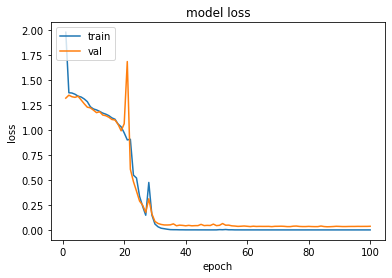

In [0]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('Final1.png')
plt.show()

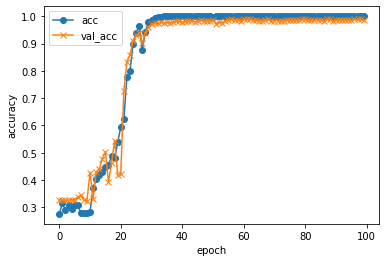

In [0]:
plt.plot(history.history["acc"], label="acc", ls="-", marker="o")
plt.plot(history.history["val_acc"], label="val_acc", ls="-", marker="x")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(loc="best")
plt.savefig('Final2.png')
plt.show()

In [0]:
print("\n test acc : %.4f" % (vgg_model.evaluate(X_test, y_test)[1]))

628/628 [==============================] - 3s 5ms/step

 test acc : 0.9697
